In [2]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import cluster
from sklearn import preprocessing
import scipy.cluster.hierarchy

10. In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in R that you can use to
generate data. One example is the rnorm() function; runif() is
another option. Be sure to add a mean shift to the observations
in each class so that there are three distinct classes.

In [75]:
means = (5, -2, 15)
scale = (3, 3, 3)
df = pd.DataFrame([])
for i in range(len(means)):
    df = pd.concat([df, pd.DataFrame(scipy.stats.uniform.rvs(np.zeros((20,50)))*scale[i]*(1+np.sin(0.88*i)) + (-1+np.sin(0.3*i))**i * means[i])])

for i,col in enumerate(df.columns):
    df.iloc[:, i] = df.iloc[:,i] * np.cos(.6*i) - np.cos(0.7*i)

In [76]:
#df

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.

In [77]:
pca = decomposition.PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.37537775 0.05970775]
[41.65107744 16.61144175]


In [78]:
pcs = pca.transform(df)

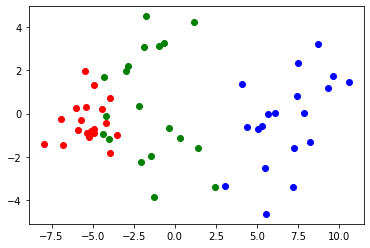

In [79]:
fig, ax = plt.subplots(1, 1)
ax.plot(pcs[:19,0], pcs[:19,1], 'ro')
ax.plot(pcs[20:39,0], pcs[20:39,1], 'bo')
ax.plot(pcs[40:59,0], pcs[40:59,1], 'go')

(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering compare to the true class labels?
Hint: You can use the table() function in R to compare the true
class labels to the class labels obtained by clustering. Be careful
how you interpret the results: K-means clustering will arbitrarily
number the clusters, so you cannot simply check whether the true
class labels and clustering labels are the same.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 0 2 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0]


Text(0.5, 1.0, 'kmeans=3')

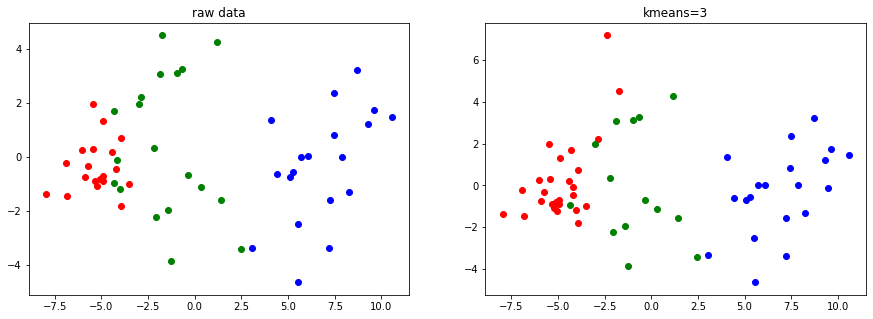

In [137]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(df)
print(kmeans.labels_)
#print(kmeans.predict([[0, 0], [12, 3]]))
#print(kmeans.cluster_centers_)
#kmeans.predict(df)
res = [pd.DataFrame([]) for i in range(3)]
for index, item in enumerate(kmeans.labels_):
    pcee = pca.transform([df.iloc[index]])
    res[item] = pd.concat([res[item], pd.DataFrame(pcee)])
res = [i.reset_index(drop=True) for i in res]
#print(res)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(pcs[:19,0], pcs[:19,1], 'ro')
ax[0].plot(pcs[20:39,0], pcs[20:39,1], 'bo')
ax[0].plot(pcs[40:59,0], pcs[40:59,1], 'go')
ax[0].set_title('raw data')
colors = ('ro', 'bo', 'go')
for i in range(3):
    ax[1].plot(res[i].iloc[:,0], res[i].iloc[:,1], colors[i])
ax[1].set_title('kmeans=3')

(d) Perform K-means clustering with K = 2. Describe your results.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


Text(0.5, 1.0, 'kmeans=2')

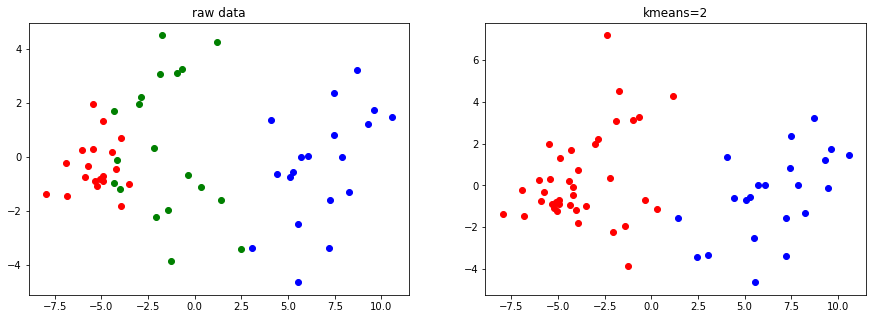

In [136]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(df)
print(kmeans.labels_)
#print(kmeans.predict([[0, 0], [12, 3]]))
#print(kmeans.cluster_centers_)
#kmeans.predict(df)
res = [pd.DataFrame([]) for i in range(2)]
for index, item in enumerate(kmeans.labels_):
    pcee = pca.transform([df.iloc[index]])
    res[item] = pd.concat([res[item], pd.DataFrame(pcee)])
res = [i.reset_index(drop=True) for i in res]
#print(res)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(pcs[:19,0], pcs[:19,1], 'ro')
ax[0].plot(pcs[20:39,0], pcs[20:39,1], 'bo')
ax[0].plot(pcs[40:59,0], pcs[40:59,1], 'go')
ax[0].set_title('raw data')
colors = ('ro', 'bo', 'go')
for i in range(2):
    ax[1].plot(res[i].iloc[:,0], res[i].iloc[:,1], colors[i])
ax[1].set_title('kmeans=2')

In [ ]:
#results appear to have red and green groups mostly merged, a couple of green poitns hve been absorbed by blue.

(e) Now perform K-means clustering with K = 4, and describe your
results.

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 2 2 2 3 3 0 2 2 2 2 2 3 2 3 3 2 2 2]


Text(0.5, 1.0, 'kmeans=4')

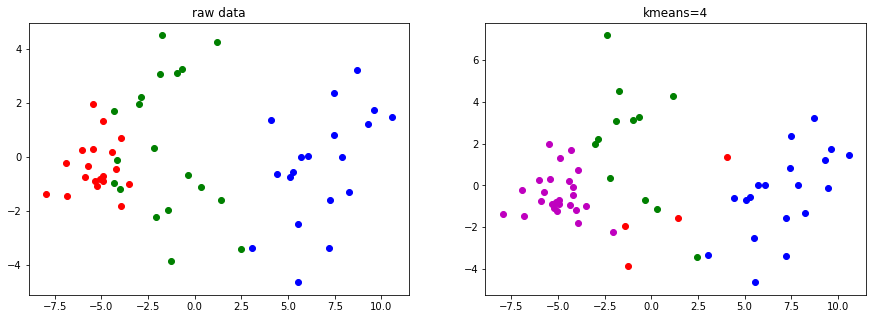

In [138]:
kmeans = cluster.KMeans(n_clusters=4, random_state=0).fit(df)
print(kmeans.labels_)
#print(kmeans.predict([[0, 0], [12, 3]]))
#print(kmeans.cluster_centers_)
#kmeans.predict(df)
res = [pd.DataFrame([]) for i in range(4)]
for index, item in enumerate(kmeans.labels_):
    pcee = pca.transform([df.iloc[index]])
    res[item] = pd.concat([res[item], pd.DataFrame(pcee)])
res = [i.reset_index(drop=True) for i in res]
#print(res)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(pcs[:19,0], pcs[:19,1], 'ro')
ax[0].plot(pcs[20:39,0], pcs[20:39,1], 'bo')
ax[0].plot(pcs[40:59,0], pcs[40:59,1], 'go')
ax[0].set_title('raw data')
colors = ('ro', 'bo', 'go', 'mo')
for i in range(4):
    ax[1].plot(res[i].iloc[:,0], res[i].iloc[:,1], colors[i])
ax[1].set_title('kmeans=4')

In [ ]:
#now it's created an additional cluster in between w/ only a fwe points

(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

In [133]:
pd.DataFrame(pcee)

,0
0,-2.351068
1,7.186901


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 2 2 2 1 1 1 2 2 2 2 2 1 0 1 1 2 2 2]


Text(0.5, 1.0, 'kmeans_3onPCA')

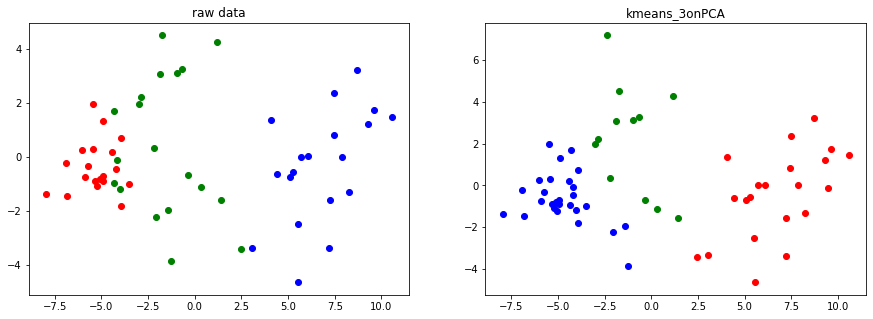

In [139]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(pcs)
print(kmeans.labels_)
#print(kmeans.predict([[0, 0], [12, 3]]))
#print(kmeans.cluster_centers_)
#kmeans.predict(df)
res = [pd.DataFrame([]) for i in range(3)]
for index, item in enumerate(kmeans.labels_):
    pcee = pcs[index,:]#pca.transform([df.iloc[index]])
    res[item] = pd.concat([res[item], pd.DataFrame([pcee])])
res = [i.reset_index(drop=True) for i in res]
#print(res)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(pcs[:19,0], pcs[:19,1], 'ro')
ax[0].plot(pcs[20:39,0], pcs[20:39,1], 'bo')
ax[0].plot(pcs[40:59,0], pcs[40:59,1], 'go')
ax[0].set_title('raw data')
colors = ('ro', 'bo', 'go', 'mo')
for i in range(3):
    ax[1].plot(res[i].iloc[:,0], res[i].iloc[:,1], colors[i])
ax[1].set_title('kmeans_3onPCA')

In [ ]:
#results were close, but not exactly the same

(g) Using the scale() function, perform K-means clustering with
K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained
in (b)? Explain.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]


Text(0.5, 1.0, 'kmeans=3, standardized')

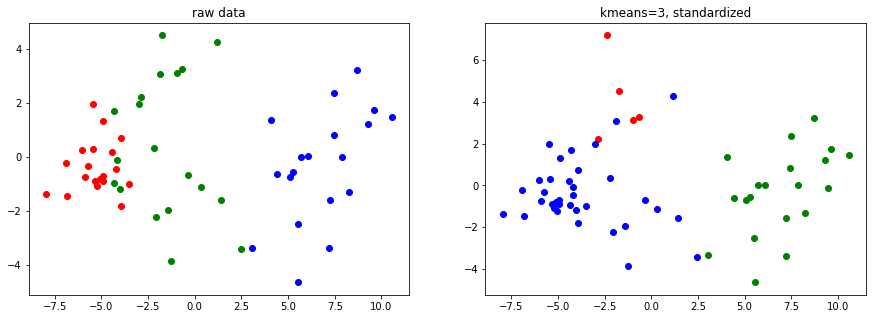

In [143]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(df)
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
print(kmeans.labels_)
#print(kmeans.predict([[0, 0], [12, 3]]))
#print(kmeans.cluster_centers_)
#kmeans.predict(df)
res = [pd.DataFrame([]) for i in range(3)]
for index, item in enumerate(kmeans.labels_):
    pcee = pca.transform([df.iloc[index]])
    res[item] = pd.concat([res[item], pd.DataFrame(pcee)])
res = [i.reset_index(drop=True) for i in res]
#print(res)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(pcs[:19,0], pcs[:19,1], 'ro')
ax[0].plot(pcs[20:39,0], pcs[20:39,1], 'bo')
ax[0].plot(pcs[40:59,0], pcs[40:59,1], 'go')
ax[0].set_title('raw data')
colors = ('ro', 'bo', 'go')
for i in range(3):
    ax[1].plot(res[i].iloc[:,0], res[i].iloc[:,1], colors[i])
ax[1].set_title('kmeans=3, standardized')

13. On the book website, www.statlearning.com, there is a gene expression data set (Ch12Ex13.csv) that consists of 40 tissue samples with
measurements on 1,000 genes. The first 20 samples are from healthy
patients, while the second 20 are from a diseased group.

In [3]:
df = pd.read_csv('https://www.statlearning.com/s/Ch12Ex13.csv', header=None)#'/home/zacharygibbs/documents/datascience/ISLR/book_content/data/Ch12Ex13.csv', header=None)

(a) Load in the data using read.csv(). You will need to select
header = F.

In [151]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507189,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114


(b) Apply hierarchical clustering to the samples using correlationbased distance, and plot the dendrogram. Do the genes separate
the samples into the two groups? Do your results depend on the
type of linkage used?

In [ ]:
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#cluster.fit_predict(X)

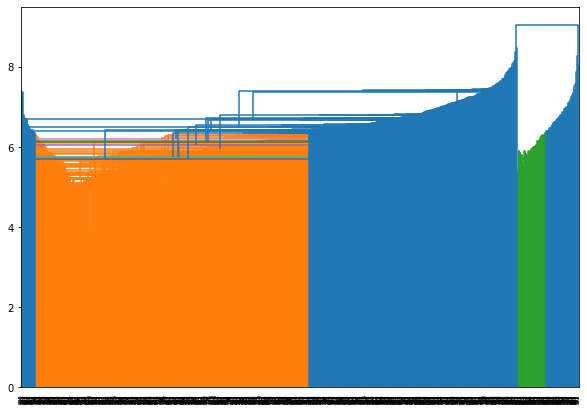

In [169]:
#https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

#complete, single, average, ward, centroid, weighted, median

clusters = scipy.cluster.hierarchy.linkage(df, method="centroid")

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
scipy.cluster.hierarchy.dendrogram(clusters,
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
#centroid seems to largely split into 2 main groups - as expected.

(c) Your collaborator wants to know which genes differ the most
across the two groups. Suggest a way to answer this question,
and apply it here.

In [170]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507189,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114
